0.79 0.82
0.91 0.94
0.94 0.96
0.96 0.94
0.96 0.96
0.95 0.97
0.97 0.93
0.97 0.92
0.97 0.93
0.96 0.89
0.97 0.94
0.97 0.92
0.95 0.92
0.97 0.95
0.97 0.92
0.97 0.93
0.97 0.91
0.96 0.96
0.97 0.95
0.91 0.94
0.95 0.95
0.96 0.97
0.98 0.97
0.99 0.97
0.99 0.98
0.99 0.97
0.99 0.94
0.99 0.96
0.99 0.95
1.00 0.97
0.99 0.97
0.99 0.96
1.00 0.97
1.00 0.97
0.99 0.95
0.99 0.96
0.99 0.95
0.99 0.97
0.93 0.94
0.96 0.95
0.97 0.97
0.99 0.97
0.99 0.98
1.00 0.96
0.99 0.96
1.00 0.97
1.00 0.97
1.00 0.98
1.00 0.97
1.00 0.97
1.00 0.98
0.99 0.98
1.00 0.96
1.00 0.97
1.00 0.98
1.00 0.98
1.00 0.95
0.92 0.92
0.96 0.96
0.97 0.97
1.00 0.98
0.99 0.97
1.00 0.98
1.00 0.97
0.99 0.97
1.00 0.98
1.00 0.97
1.00 0.97
1.00 0.98
1.00 0.98
1.00 0.98
1.00 0.97
1.00 0.98
1.00 0.97
1.00 0.98
1.00 0.98
0.93 0.94
0.96 0.98
0.97 0.97
0.99 0.97
0.99 0.97
1.00 0.98
1.00 0.98
1.00 0.97
0.99 0.97
1.00 0.98
1.00 0.99
1.00 0.99
1.00 0.97
1.00 0.98
1.00 0.97
1.00 0.98
1.00 0.96
1.00 0.97
1.00 0.97
0.93 0.94
0.96 0.96
0.97 0.98
0.98 0.97
0.99 0.98


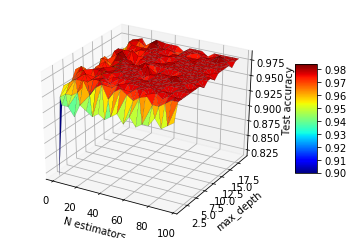

In [2]:
from __future__ import print_function

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.base import clone
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.mlab import griddata
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

def printAccuracy(clf, Xtr, Xte):
	y_hat_test = clf.predict(Xte)
	y_hat_train = clf.predict(Xtr)
	acc_train =accuracy_score(y_train, y_hat_train)
	acc_test = accuracy_score(y_test,y_hat_test)

	print('%.2f %.2f' % (acc_train, acc_test))
	return acc_train, acc_test





data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

from sklearn.ensemble import RandomForestClassifier

plot_3d = []
for n_est in range(1,100,5):
	for max_depth in range(1,20):
		for min_samples_split in [3]:
			rf = RandomForestClassifier(n_estimators = n_est, max_depth = max_depth,\
										min_samples_split = min_samples_split).fit(X_train,y_train)

			acc = printAccuracy(rf, X_train, X_test)
			plot_3d.append([n_est,max_depth,min_samples_split,acc[1]])

plot_3d = np.array(plot_3d)

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import pandas as pd

fig = plt.figure()
ax = fig.gca(projection='3d')

pltX, pltY = plot_3d[:,0], plot_3d[:,1]
#pltX, pltY = np.meshgrid(pltX, pltY)
pltZ = plot_3d[:,-1]
## DataFrame from 2D-arrays

df = pd.DataFrame({'x': pltX, 'y': pltY, 'z': pltZ}, index=range(len(pltX)))

# Plot using `.trisurf()`:

surf = ax.plot_trisurf(df.x, df.y, df.z, cmap='jet', linewidth=0.1, edgecolor='k')
ax.set_xlabel('N estimators')
ax.set_ylabel('max_depth')
ax.set_zlabel('Test accuracy')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
#plt.savefig('plot_3d_nest_maxdepth_RF.pdf',dpi=500)